# Introduction to Pandas, Part 2

Advanced Pandas syntax, aggregation, and joining.

In [1]:
import numpy as np
import pandas as pd

Let's start by loading the California baby names again.

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
45407,CA,F,1961,Hattie,6
64710,CA,F,1971,Roseanna,7
271409,CA,M,1960,Ricardo,238
316886,CA,M,1989,Franciscojavier,6
205371,CA,F,2013,Korina,5


In [18]:
(
    babynames.query('Sex == "M" and Year == 2020')
.sort_values("Count", ascending = False)
)

,State,Sex,Year,Name,Count
391409,CA,M,2020,Noah,2608
391410,CA,M,2020,Liam,2406
391411,CA,M,2020,Mateo,2057
391412,CA,M,2020,Sebastian,1981
391413,CA,M,2020,Julian,1679
...,...,...,...,...,...
393938,CA,M,2020,Gavino,5
393937,CA,M,2020,Gaspar,5
393936,CA,M,2020,Gannon,5
393935,CA,M,2020,Galen,5


In [19]:
(babynames.query('Sex == "M" and Year == 2020').sort_values("Name", ascending = False)
)

,State,Sex,Year,Name,Count
393226,CA,M,2020,Zyon,9
394178,CA,M,2020,Zymir,5
393352,CA,M,2020,Zyan,8
392118,CA,M,2020,Zyaire,37
392838,CA,M,2020,Zyair,13
...,...,...,...,...,...
393106,CA,M,2020,Aamir,9
393822,CA,M,2020,Aalam,5
393354,CA,M,2020,Aaditya,7
393353,CA,M,2020,Aadi,7


In [20]:
(
babynames.query('Sex == "M" and Year == 2020')
         .sort_values("Name", key = lambda x: len(x),#str.len(),
                      ascending = False)
)

TypeError: object of type 'int' has no len()

---

An alternate approach is to create a temporary column corresponding to the length

In [21]:
#create a new series of only the lengths
babyname_lengths = babynames["Name"].str.len()

#add that series to the dataframe as a column
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [22]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(25)

,State,Sex,Year,Name,Count,name_lengths
332035,CA,M,1998,Franciscojavier,6,15
329864,CA,M,1997,Franciscojavier,5,15
320036,CA,M,1993,Ryanchristopher,5,15
314358,CA,M,1991,Ryanchristopher,7,15
319923,CA,M,1993,Johnchristopher,5,15
337003,CA,M,2000,Franciscojavier,6,15
305111,CA,M,1987,Franciscojavier,5,15
330040,CA,M,1997,Ryanchristopher,5,15
306544,CA,M,1988,Franciscojavier,10,15
309451,CA,M,1989,Franciscojavier,6,15


In [23]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
332035,CA,M,1998,Franciscojavier,6
329864,CA,M,1997,Franciscojavier,5
320036,CA,M,1993,Ryanchristopher,5
314358,CA,M,1991,Ryanchristopher,7
319923,CA,M,1993,Johnchristopher,5


We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [24]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

#create the temporary column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

#sort by the temporary column
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
131013,CA,F,1994,Leandrea,5,3
101962,CA,F,1986,Deandrea,6,3
115942,CA,F,1990,Deandrea,5,3
300700,CA,M,1985,Deandrea,6,3
108715,CA,F,1988,Deandrea,5,3


In [25]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)

In [26]:
#drop that column
babynames = babynames.drop("dr_ea_count", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
115942,CA,F,1990,Deandrea,5
300700,CA,M,1985,Deandrea,6
108715,CA,F,1988,Deandrea,5
101962,CA,F,1986,Deandrea,6


---

###Female Name whose popularity has dropped the most.

In this exercise, let's find the female name whose popularity has dropped the most since its peak. As an example of a name that has fallen into disfavor, consider "Jennifer", visualized below.

Note: We won't cover plotly in lecture until week 4 after Lisa covers EDA and Regex.

In [27]:
fig = px.line(babynames.query("Name == 'Jennifer' and Sex == 'F'"), x = "Year", y = "Count")
fig.update_layout(font_size = 18)

NameError: name 'px' is not defined

To answer this question, we'll need a mathematical definition for the change in popularity of a name.

For the purposes of lecture, let’s use the RTP or ratio_to_peak. This is the current count of the name divded by its maximum ever count.

Getting the max Jennifer is easy enough.

In [28]:
max_jennifers = max(babynames.query("Name == 'Jennifer' and Sex == 'F'")["Count"])
max_jennifers

6064

And we can get the most recent Jennifer count with `iloc[-1]` (TODO: Maybe make this an exercise)

In [29]:
current_jennifers = babynames.query("Name == 'Jennifer' and Sex == 'F'")["Count"].iloc[-1]
current_jennifers

709

In [30]:
current_jennifers / max_jennifers

0.11691952506596306

We can also write a function that produces the ratio_to_peak for a given series.

Here for clarity, let's regenerate the `jennifer_counts` Series, but let's do so on a DataFrame where the index is the year.

In [31]:
def ratio_to_peak(series):
    return series.iloc[-1] / max(series)

In [32]:
jennifer_counts_series = babynames.query("Name == 'Jennifer' and Sex == 'F'")["Count"]
ratio_to_peak(jennifer_counts_series)

0.11691952506596306

We can try out various names below: 

In [33]:
ratio_to_peak(babynames.query("Name == 'Jessica' and Sex == 'F'")["Count"])

0.09106603366422097

Since we're only working with female names, let's create a DataFrame with only female names to simplify our later code.

In [34]:
female_babynames = babynames[babynames["Sex"] == "F"] #could have also used query but I want to use various types of syntax to increase your exposure to other ways of writing code

### Approach 1: Naive For Loop

As a first approach, we can try to use a for loop.

In [35]:
#build dictionary where each entry is the rtp for a given name
#e.g. rtps["jennifer"] should be 0.0231
#rtps = {}
#for name in ??:
#    counts_of_current_name = female_babynames[??]["Count"]
#    rtps[name] = ratio_to_peak(counts_of_current_name)
    
#convert to series
#rtps = pd.Series(rtps) 
#rtps

Answer below. Note that we only used the first 100 names because otherwise the code takes ages to complete running.

In [39]:
df = pd.DataFrame(
    {
        "A": [1, 1, 2, 2],
        "B": [1, 2, 3, 4],
        "C": [0.362838, 0.227877, 1.267767, -0.562860],
    }
)
df.groupby('A').agg('min')

,B,C
A,,
1,1,0.227877
2,3,-0.562860


In [38]:
#build dictionary where entry i is the ammd for the given name
#e.g. rtps["jennifer"] should be 0.0231
rtps = {}
for name in babynames["Name"].unique()[0:100]:
    counts_of_current_name = female_babynames[female_babynames["Name"] == name]["Count"]
    rtps[name] = ratio_to_peak(counts_of_current_name)
    
#convert to series
rtps = pd.Series(rtps) 
rtps

IndexError: single positional indexer is out-of-bounds

In [ ]:
rtps.sort_values()

### Approach 2: Use groupby.agg

Instead, we can use the very powerful groupby.agg operation, which allows us to simply and efficiently compute what we want.

In [40]:
female_babynames.head()

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
115942,CA,F,1990,Deandrea,5
108715,CA,F,1988,Deandrea,5
101962,CA,F,1986,Deandrea,6
212474,CA,F,2015,Leandra,7


In [41]:
female_babynames

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
115942,CA,F,1990,Deandrea,5
108715,CA,F,1988,Deandrea,5
101962,CA,F,1986,Deandrea,6
212474,CA,F,2015,Leandra,7
...,...,...,...,...,...
79750,CA,F,1978,Kia,9
165624,CA,F,2004,Kai,23
59532,CA,F,1969,Lia,25
59529,CA,F,1969,Kay,25


In [54]:
rtp_table = female_babynames.groupby("Name").agg('count')
female_babynames.set_index('Name').loc['Aadhira', :]['Year']

#Note: If this cell crashes, comment out the code and use the female_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak) instead

Name
Aadhira    2018
Aadhira    2017
Aadhira    2020
Name: Year, dtype: int64

This is simply the equivalent of [http://data8.org/datascience/_autosummary/datascience.tables.Table.group.html](http://data8.org/datascience/_autosummary/datascience.tables.Table.group.html) from Data8, e.g. if babynames were using `Table`, our code would read:

`female_babynames.group("Name", ratio_to_peak)`

For a visual review of groupby, see this [lecture slide](https://docs.google.com/presentation/d/1FC-cs5MTGSkDzI_7R_ZENgwoHQ4aVamxFOpJuWT0fo0/edit#slide=id.g477ed0f02e_0_390).

If you're using an early enough version of pandas, the code above will not crash, and will automatically drop columns for which `ratio_to_peak` fails, e.g. the Sex column. 

However, according to a warning message that is generated as of January 2022, at some point this code will no longer be considered valid Pandas code, and the code will crash on columns for which the aggregation function is undefined. 

Whether we're trying to avoid a crash, or just want a clean DataFrame, let's explicitly select only the Count column. The idea here is that we don't really care about the meaningless Year column, so we may as well exclude it when we compute our `ratio_to_peak` values. 

In [43]:
rtp_table = female_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak)
rtp_table

,Count
Name,
Aadhira,0.600000
Aadhya,0.900000
Aadya,0.896552
Aahana,0.307692
Aahna,1.000000
...,...
Zyanya,0.357143
Zyla,0.375000
Zylah,0.785714


In [44]:
# this code renames the Count column to RTP. You'll see this syntax in lab
rtp_table = rtp_table.rename(columns = {"Count": "Count RTP"})
rtp_table

,Count RTP
Name,
Aadhira,0.600000
Aadhya,0.900000
Aadya,0.896552
Aahana,0.307692
Aahna,1.000000
...,...
Zyanya,0.357143
Zyla,0.375000
Zylah,0.785714


In [46]:
rtp_table.sort_values("Count RTP")

,Count RTP
Name,
Sofia,0.002844
Alexa,0.003475
Megan,0.003986
Luna,0.003997
Veronica,0.004295
...,...
Lenya,1.000000
Nisa,1.000000
Nirvi,1.000000


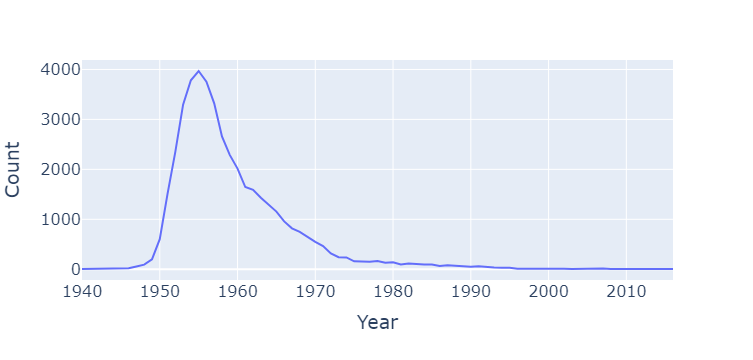

In [23]:
fig = px.line(babynames.query("Name == 'Debra' and Sex == 'F'"), x = "Year", y = "Count")
fig.update_layout(font_size = 16)

In [24]:
top10 = rtp_table.sort_values("Count RTP").head(10).index
top10

Index(['Debra', 'Debbie', 'Susan', 'Kim', 'Tammy', 'Terri', 'Shannon',
       'Cheryl', 'Lisa', 'Patricia'],
      dtype='object', name='Name')

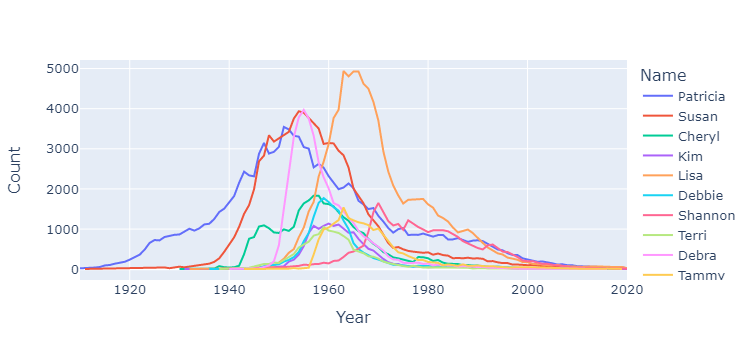

In [25]:
fig = px.line(babynames.query("Name in @top10 and Sex == 'F'"), x = "Year", y = "Count", color = "Name")
fig.update_layout(font_size = 13)

---

## Some Additional Groupby Puzzles

Groupby puzzle #1: Try to create a groupby.agg call that gives the total babies born with each name.

In [26]:
puzzle1 = female_babynames.groupby("Name")[["Count"]].agg(sum)
puzzle1

,Count
Name,
Aadhira,22
Aadhya,368
Aadya,230
Aahana,129
Aahna,7
...,...
Zyanya,174
Zyla,107
Zylah,95


Groupby puzzle #2: Try to create a groupby.agg call that gives total babies born in each year.

In [27]:
puzzle2 = female_babynames.groupby("Year")[["Count"]].agg(sum)
puzzle2

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2016,203360
2017,195352
2018,188919


We can write this using a groupby shorthand aggregation method. Here, `sum()` is shorthand for `groupby.agg(sum)`.

In [28]:
puzzle2 = female_babynames.groupby("Year")[["Count"]].sum()

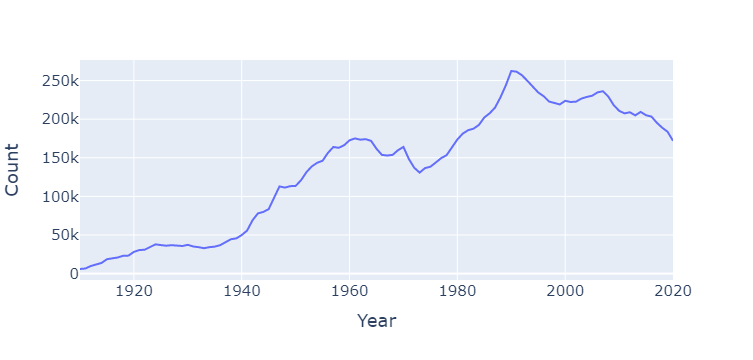

In [29]:
fig = px.line(puzzle2, y = "Count")
fig.update_layout(font_size = 15)

In [30]:
#not covered in lecture but we can also compute relative births
relative_births = puzzle2 / max(puzzle2["Count"])

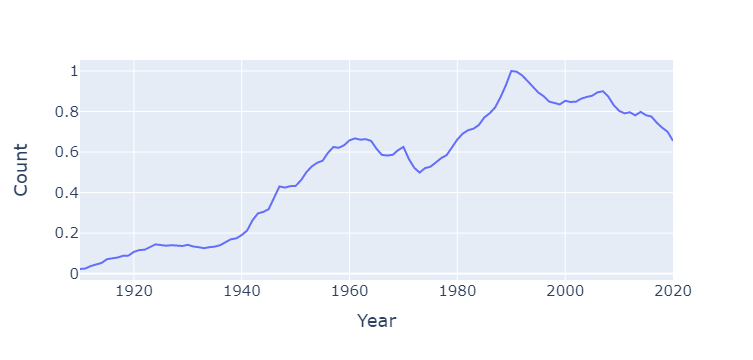

In [31]:
fig = px.line(relative_births, y = "Count")
fig.update_layout(font_size = 15)

#### groupby Puzzle #4

In [64]:
elections = pd.read_csv("elections.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
98,1944,Thomas E. Dewey,Republican,22017929,loss,46.226199
34,1876,Samuel J. Tilden,Democratic,4288546,loss,51.528376
42,1888,Alson Streeter,Union Labor,146602,loss,1.288861
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
113,1964,Barry Goldwater,Republican,27175754,loss,38.655297


We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson successfully ran for election in 2020. Why is this happening?

In [33]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2020,Woodrow Wilson,81268924,win,61.344703


### Quick Subpuzzle

Inspired by above, try to predict the results of the groupby operation shown. The answer is below the image.

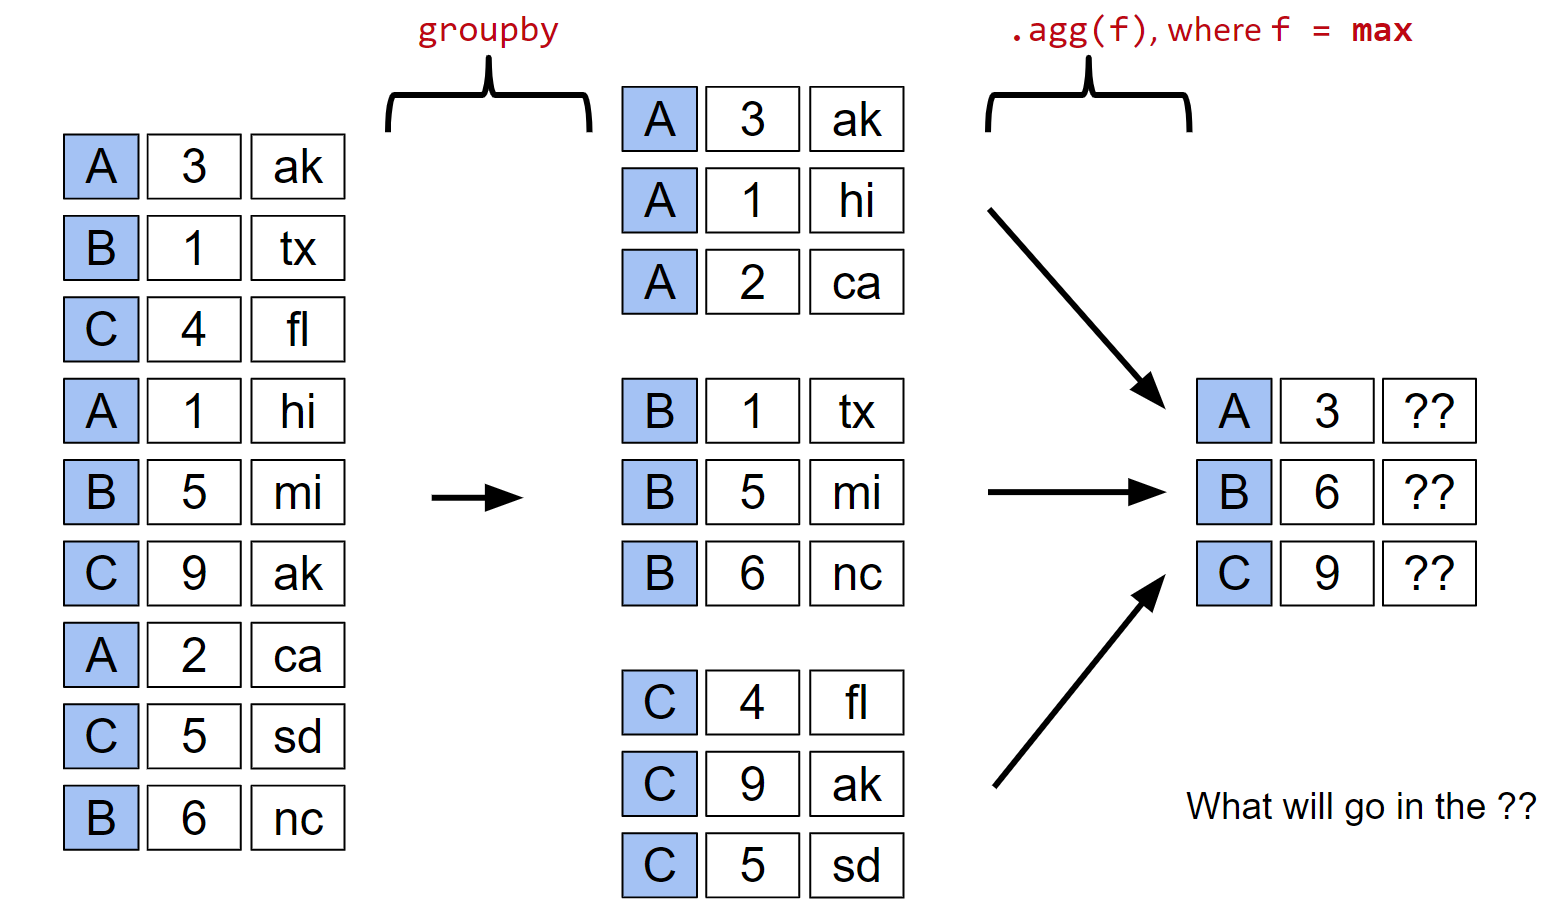

The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd". 

In [34]:
ds = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], 
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']), 
                      index=list('ABCABCACB') )
ds

,x,y
A,3,ak
B,1,tx
C,4,fl
A,1,hi
B,5,mi
C,9,ak
A,2,ca
C,5,sd
B,6,nc


In [35]:
ds.groupby(ds.index).agg(max)

,x,y
A,3,hi
B,6,tx
C,9,sd


### Completing groupby puzzle #4

Next we'll write code that properly returns _the best result by each party_. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above), here's what the first rows of the correct output should look like:

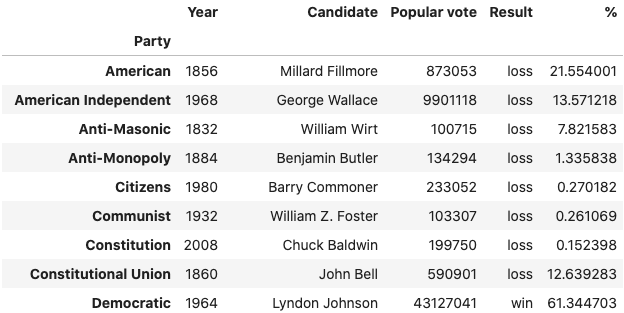

In [36]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(5)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326


In [37]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0]).head(9)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


In [38]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0]).head(9)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


You'll soon discover that with Pandas' rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity and more.  It will take some experience for you to develop a sense of which approach is better for each problem, but you should in general try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here's a couple of other ways of obtaining the same result (in each case we only show the top part with `head()`).  The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  We then index and sort by party to match the requested formatting:

In [39]:
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [40]:
elections.groupby('Party')['%'].idxmax()

Party
American                  22
American Independent     115
Anti-Masonic               6
Anti-Monopoly             38
Citizens                 127
Communist                 89
Constitution             164
Constitutional Union      24
Democratic               114
Democratic-Republican      0
Dixiecrat                103
Farmer–Labor              78
Free Soil                 15
Green                    155
Greenback                 35
Independent              143
Liberal Republican        31
Libertarian              175
National Democratic       50
National Republican        3
National Union            27
Natural Law              148
New Alliance             136
Northern Democratic       26
Populist                  48
Progressive               68
Prohibition               49
Reform                   150
Republican               120
Socialist                 66
Southern Democratic       25
States' Rights           110
Taxpayers                147
Union                     93
Union La

In [41]:
best_per_party = elections.loc[elections.groupby('Party')['%'].idxmax()]  # This is the computational part
best_per_party.set_index('Party').sort_index().head()  # This indexes by Party to match the formatting above

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


And this one doesn't even use `groupby`! This approach instead uses the `drop_duplicates` method to keep only the last occurrence of of each party after having sorted by "%", which is the best performance.  Again, the 2nd line is purely formatting:

In [42]:
best_per_party2 = elections.sort_values('%').drop_duplicates(['Party'], keep='last')
best_per_party2.set_index('Party').sort_index().head()  # Formatting

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


*Challenge:* see if you can find yet another approach that still gives the same answer.

---

## Other DataFrameGroupBy Features

The result of groupby is not a DataFrame or a list of DataFrames. It is instead a special type called a `DataFrameGroupBy`.

In [43]:
grouped_by_year = babynames.groupby("Year")
type(grouped_by_year)

pandas.core.groupby.generic.DataFrameGroupBy

### groupby.size()

In [44]:
elections.groupby("Party")

In [45]:
#size returns a Series giving the size of each group
elections.groupby("Party").size().head(15)

Party
American                  2
American Independent      3
Anti-Masonic              1
Anti-Monopoly             1
Citizens                  1
Communist                 1
Constitution              3
Constitutional Union      1
Democratic               47
Democratic-Republican     2
Dixiecrat                 1
Farmer–Labor              1
Free Soil                 2
Green                     7
Greenback                 1
dtype: int64

### groupby.filter()

In [46]:
# filter gives a copy of the original DataFrame where row r is included
# if its group obeys the given condition
#
# Note: Filtering is done per GROUP, not per ROW.
elections.groupby("Year").filter(lambda sf: sf["%"].max() < 45)

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311
66,1912,Eugene V. Debs,Socialist,901551,loss,6.004354
67,1912,Eugene W. Chafin,Prohibition,208156,loss,1.386325
68,1912,Theodore Roosevelt,Progressive,4122721,loss,27.457433
69,1912,William Taft,Republican,3486242,loss,23.218466
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
115,1968,George Wallace,American Independent,9901118,loss,13.571218


In [49]:
# the code below lets us peek into the groups and see why they were rejected or not
for i, (n, g) in enumerate(elections.groupby("Party")):
    print(n)
    display(g)
    if i>3: break

American


,Year,Candidate,Party,Popular vote,Result,%
22,1856,Millard Fillmore,American,873053,loss,21.554001
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


American Independent


,Year,Candidate,Party,Popular vote,Result,%
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640


Anti-Masonic


,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583


Anti-Monopoly


,Year,Candidate,Party,Popular vote,Result,%
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838


Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


## Puzzle 5: Finding the number of babies born in each year of each sex.

Earlier we saw how to add up the total number of babies born in each year, but what if we want the number born in each and year for each sex separately?

In [57]:
babynames.groupby("Year").sum()

,Count
Year,
1910,9163
1911,9983
1912,17946
1913,22094
1914,26926
...,...
2016,426658
2017,410614
2018,394826


It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the total number of babies of each sex born in each year.

In [54]:
babynames.head(10)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
5,CA,F,1910,Ruth,128
6,CA,F,1910,Evelyn,126
7,CA,F,1910,Alice,118
8,CA,F,1910,Virginia,101
9,CA,F,1910,Elizabeth,93


In [50]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

In [51]:
babynames.groupby(["Sex", "Year"]).agg(sum).head(6)

Count
Sex Year       
F   1910   5950
    1911   6602
    1912   9804
    1913  11860
    1914  13815
    1915  18643

The DataFrame resulting from an aggregation operation on a table grouped by a list of columns is multi-indexed. That is, it has more than one dimension to its index. We will explore this in a future lecture.

A more natural approach is to use a pivot table (like we saw in data 8).

In [55]:
babynames.head(5)

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
115942,CA,F,1990,Deandrea,5
300700,CA,M,1985,Deandrea,6
108715,CA,F,1988,Deandrea,5
101962,CA,F,1986,Deandrea,6


In [57]:
babynames_pivot = babynames.pivot_table(
    index='Year',     # the rows (turned into index)
    columns='Sex',    # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=np.sum,   # group operation
)
babynames_pivot.head(6)

Sex,F,M
Year,,
1910,5950,3213
1911,6602,3381
1912,9804,8142
1913,11860,10234
1914,13815,13111
1915,18643,17192


In [59]:
babynames_pivot = babynames.pivot_table(
    index='Year',     # the rows (turned into index)
    columns='Sex',    # the column values
    values=['Count', 'Name'], 
    aggfunc=np.max,   # group operation
)
babynames_pivot.head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

The basic idea behind pivot tables is shown in the image below.

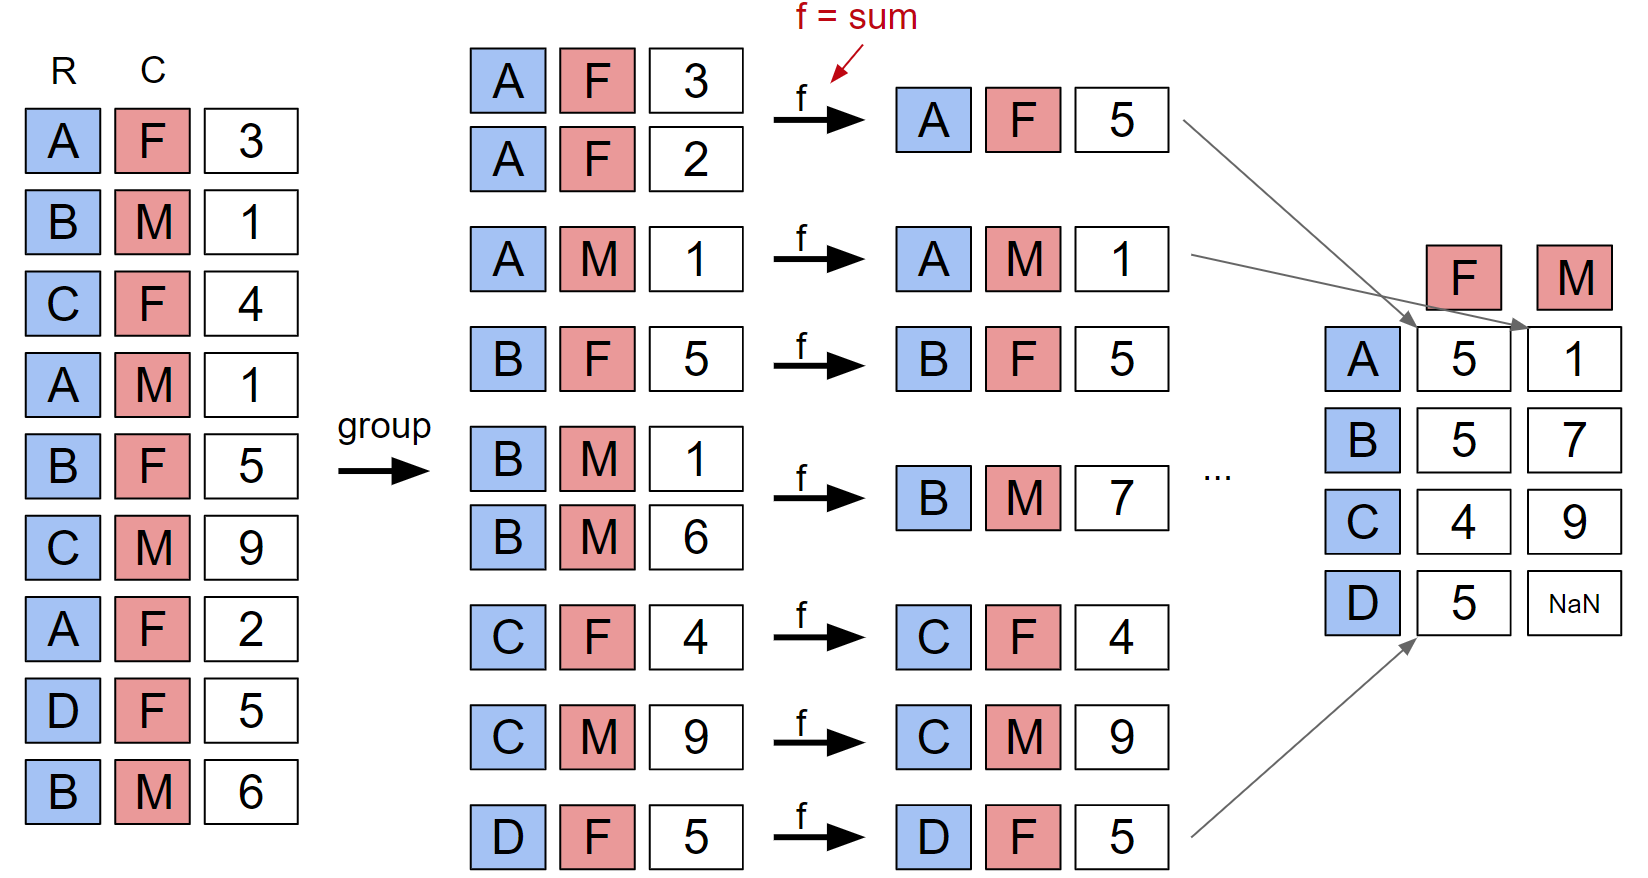

---

## Merging Tables

In [63]:
elections

NameError: name 'elections' is not defined

In [107]:
male_2020_babynames = babynames.query('Sex == "M" and Year == 2020')
male_2020_babynames

,State,Sex,Year,Name,Count
392447,CA,M,2020,Deandre,19
394024,CA,M,2020,Leandre,5
392438,CA,M,2020,Andreas,19
391863,CA,M,2020,Leandro,72
392562,CA,M,2020,Rudra,17
...,...,...,...,...,...
393418,CA,M,2020,Demetri,7
393881,CA,M,2020,Casimir,5
393393,CA,M,2020,Bridger,7
393391,CA,M,2020,Brayson,7


In [65]:
elections["First Name"] = elections["Candidate"].str.split().str[0]

In [66]:
elections

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew
...,...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699,Jill
178,2020,Joseph Biden,Democratic,81268924,win,51.311515,Joseph
179,2020,Donald Trump,Republican,74216154,loss,46.858542,Donald
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979,Jo


In [67]:
merged = pd.merge(left = elections, right = male_2020_babynames, 
                  left_on = "First Name", right_on = "Name")
merged

NameError: name 'male_2020_babynames' is not defined

In [106]:
merged.sort_values("Count")

,Year_x,Candidate,Party,Popular vote,Result,%,First Name,State,Sex,Year_y,Name,Count
129,1996,Bill Clinton,Democratic,47400125,win,49.296938,Bill,CA,M,2020,Bill,5
106,1956,Dwight Eisenhower,Republican,35579180,win,57.650654,Dwight,CA,M,2020,Dwight,5
105,1952,Dwight Eisenhower,Republican,34075529,win,55.325173,Dwight,CA,M,2020,Dwight,5
131,1992,Ross Perot,Independent,19743821,loss,18.956298,Ross,CA,M,2020,Ross,5
132,1996,Ross Perot,Reform,8085294,loss,8.408844,Ross,CA,M,2020,Ross,5
...,...,...,...,...,...,...,...,...,...,...,...,...
121,2004,David Cobb,Green,119859,loss,0.098088,David,CA,M,2020,David,1155
120,1984,David Bergland,Libertarian,228111,loss,0.247245,David,CA,M,2020,David,1155
66,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838,Benjamin,CA,M,2020,Benjamin,1634
67,1888,Benjamin Harrison,Republican,5443633,win,47.858041,Benjamin,CA,M,2020,Benjamin,1634
